In [1]:
from scipy import ndimage
import numpy as np
import imageio.v3 as iio

In [2]:
orig_img = iio.imread('/home/user/Downloads/HiDimaging/From_Caroline/Exp6/img/exp6_wp2_C001H001S0001000001.tif')

In [3]:
from pyptv.ptv import image_split

In [4]:
list_of_images = image_split(orig_img)

Splitting (1024, 1024) into four quadrants of size (512, 512)


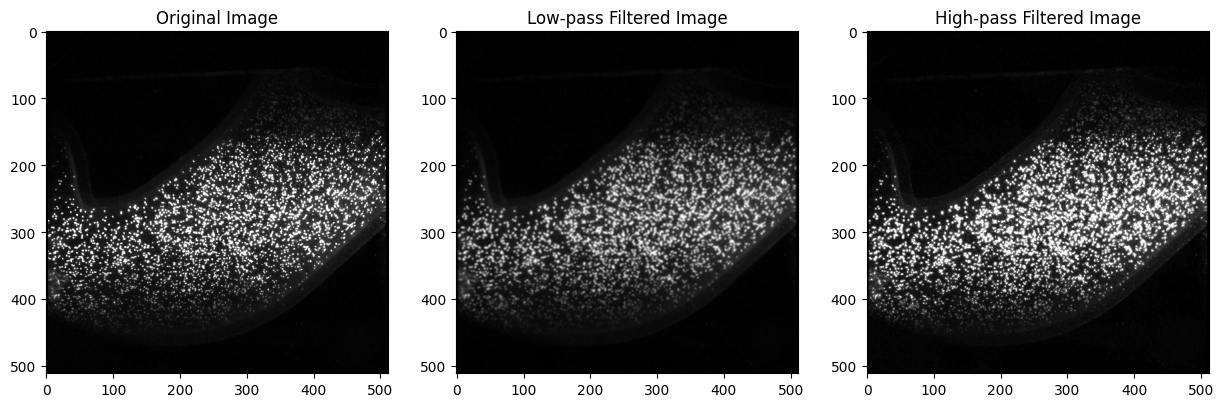

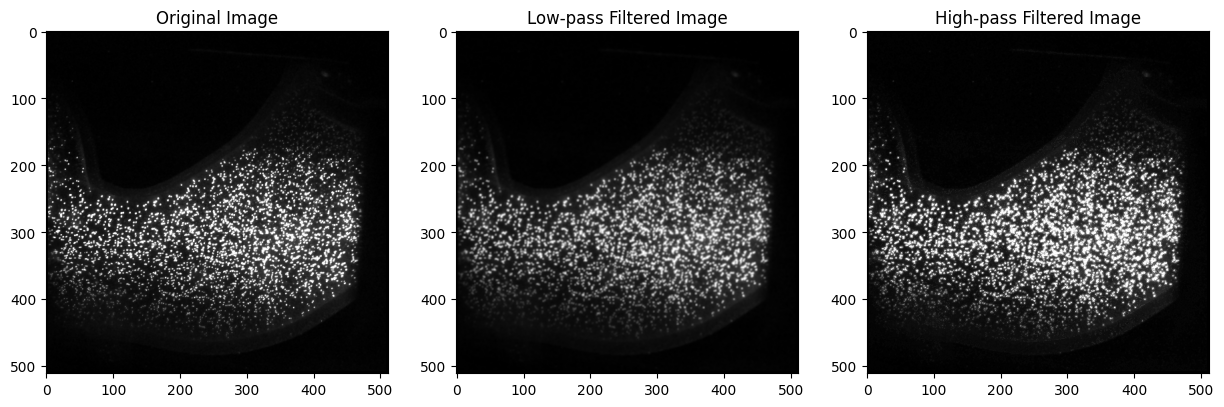

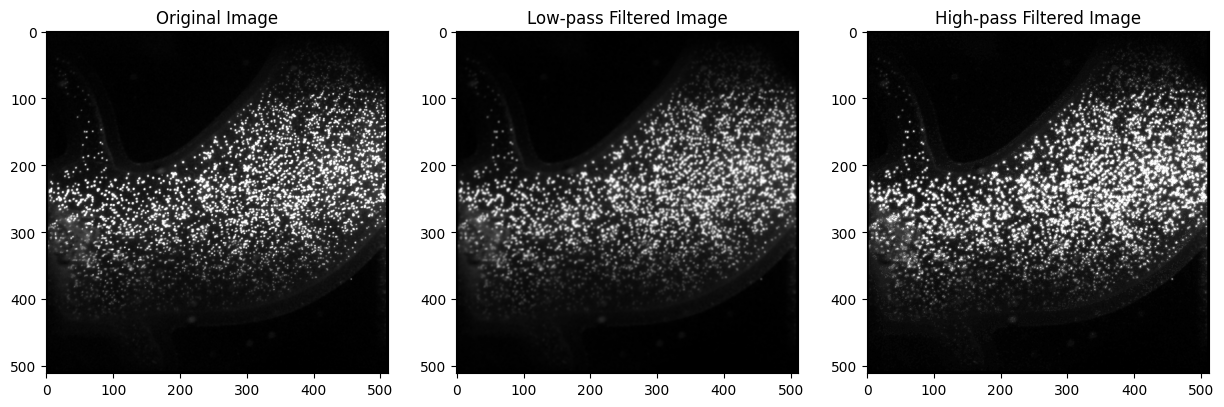

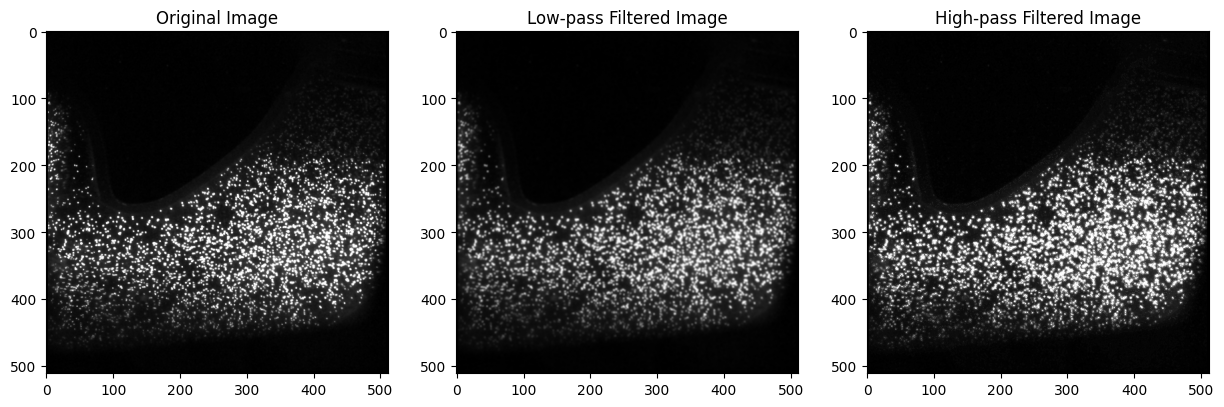

In [5]:
for img in list_of_images:

    img_lp = ndimage.uniform_filter(
        img,
        size=1 * 2 + 1,
        mode="constant",
        cval=0,
    )

    # Subtract low-pass filtered image from original image
    img_hp = img | img_lp
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].set_title('Original Image')
    ax[1].set_title('Low-pass Filtered Image')
    ax[2].set_title('High-pass Filtered Image') 
    ax[0].imshow(img, cmap='gray')
    ax[1].imshow(img_lp, cmap='gray')
    ax[2].imshow(img_hp, cmap='gray')

In [6]:
from optv.image_processing import preprocess_image
from optv.parameters import ControlParams



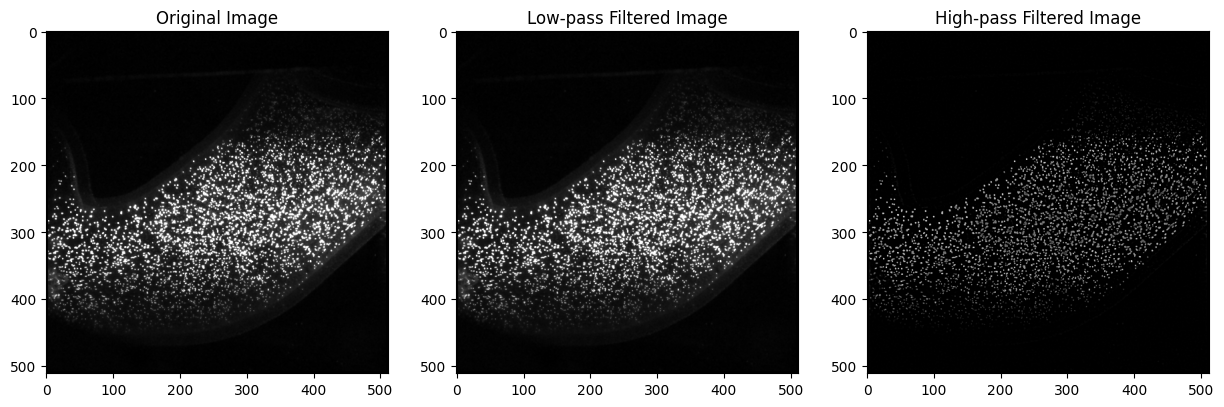

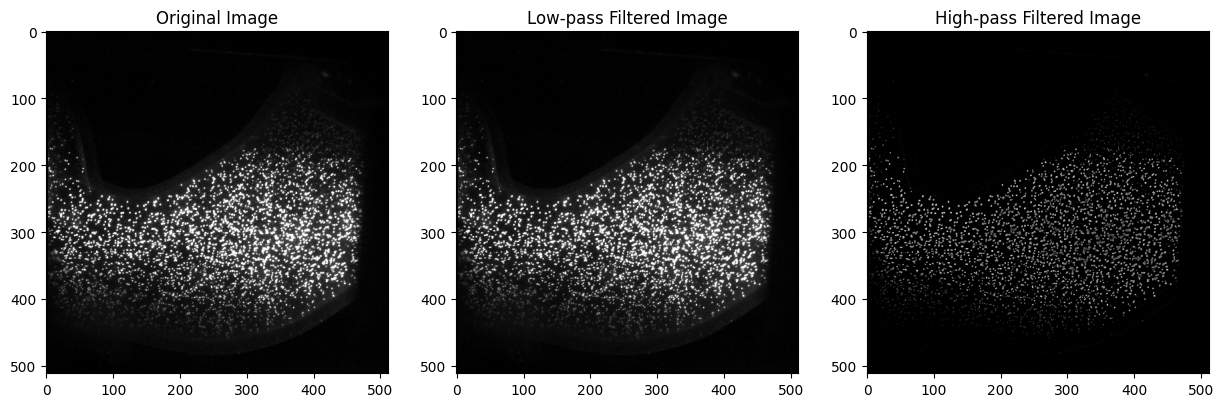

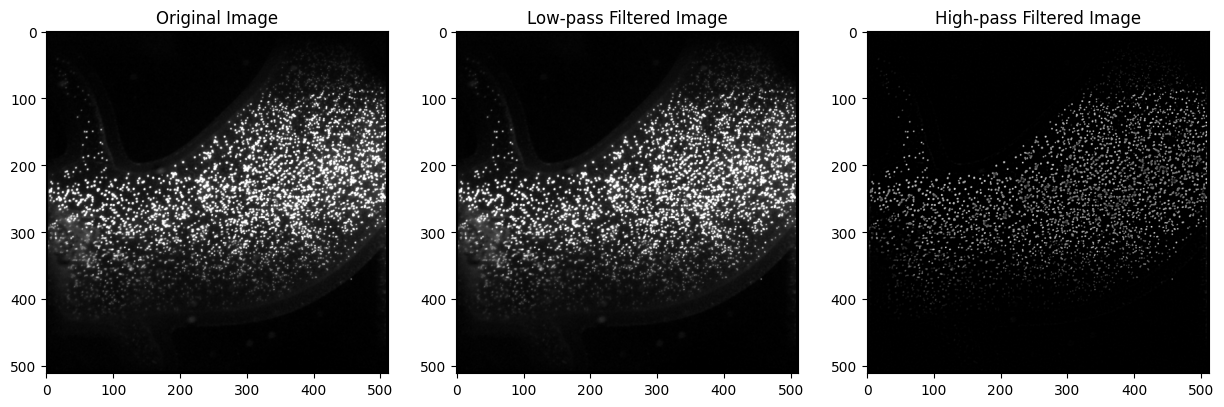

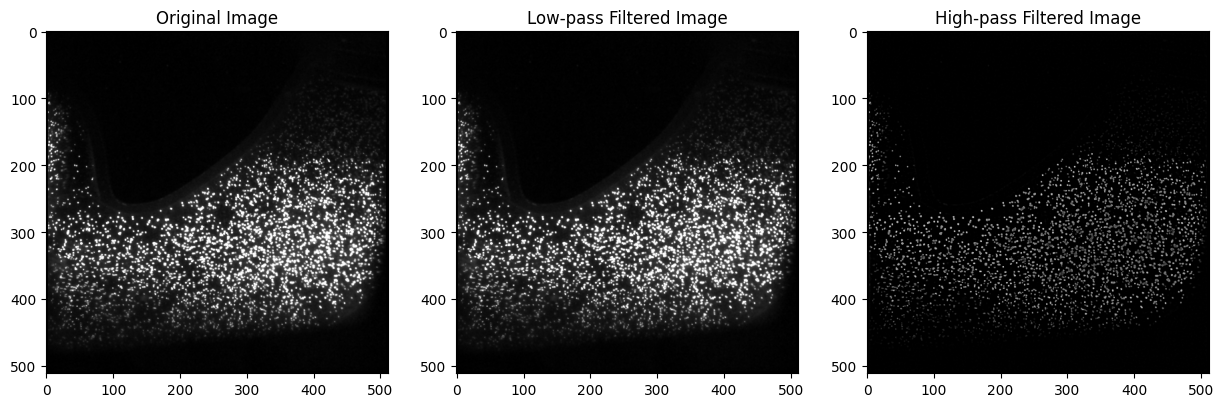

In [7]:
cpar = ControlParams(4)
cpar.set_image_size((512, 512))

for img in list_of_images:

    img_lp = img.copy()
    # img_lp[:3, :] = 0
    # img_lp[-3:, :] = 0
    # img_lp[:, :3] = 0
    # img_lp[:, -3:] = 0

    img_hp = preprocess_image(img_lp, 0, cpar, 3)

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].set_title('Original Image')
    ax[1].set_title('Low-pass Filtered Image')
    ax[2].set_title('High-pass Filtered Image') 
    ax[0].imshow(img, cmap='gray')
    ax[1].imshow(img_lp, cmap='gray')
    ax[2].imshow(img_hp, cmap='gray')

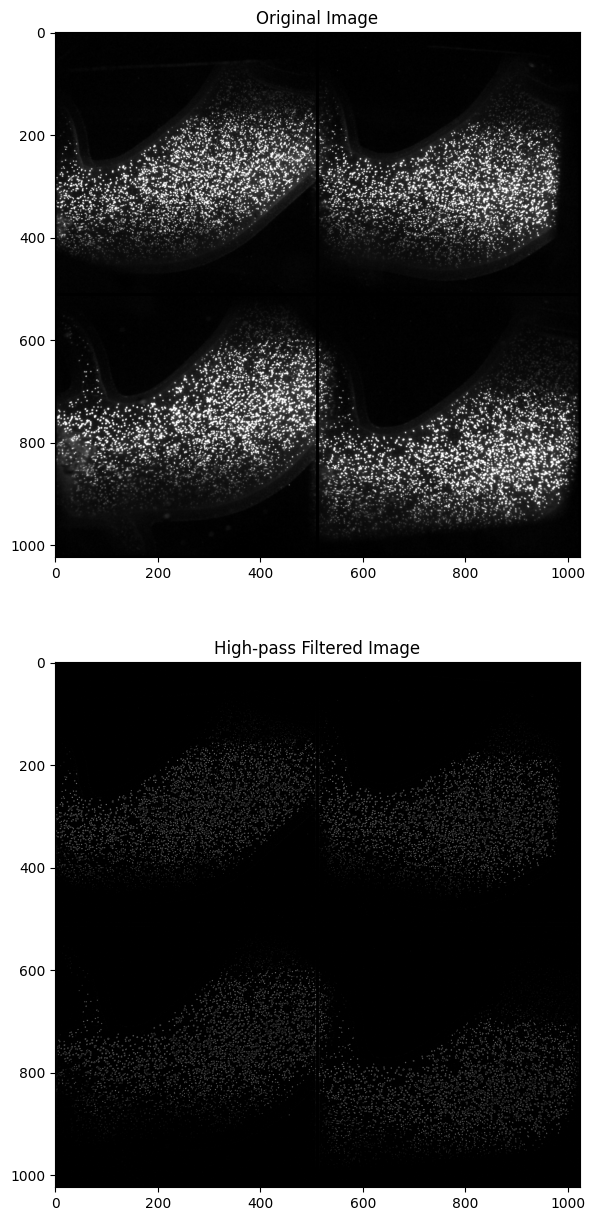

In [8]:
cpar = ControlParams(1)
cpar.set_image_size((1024, 1024))

orig_img_hp = preprocess_image(orig_img, 0, cpar, 1)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, figsize=(15,15))
ax[0].set_title('Original Image')
ax[1].set_title('High-pass Filtered Image') 
ax[0].imshow(orig_img, cmap='gray')
ax[1].imshow(orig_img_hp, cmap='gray')